<a href="https://colab.research.google.com/github/MohammedAimanHESSin/Image-Segmentation/blob/master/PR_Ass_2_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone the git hub 
# to add the dataset in the 
#VR files
!git clone https://github.com/osamasherif22/Image-Segmentation

fatal: destination path 'Image-Segmentation' already exists and is not an empty directory.


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow
from scipy import io
import scipy
import imageio

# KMEANS

In [3]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        #centroids[i][0] = new_centroid_sum_x/float(j+1)
        #centroids[i][1] = new_centroid_sum_y/float(j+1)
        centroids[i][0] = new_centroid_sum_x/float(len(centroids))
        centroids[i][1] = new_centroid_sum_y/float(len(centroids))
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    # print("ok")
    # centroids = []
    # while(len(centroids)!=k):
    #     cent = items[random.sample(range(0, len(items)), k)]
    #     if(len(centroids)>=1):
    #         if(cent not in centroids):
    #             centroids.append(cent)
    #         else:
    #             centroids.append(cent)
    # print("Initial centroids are {}".format(centroids))
    # return cent





     centroids = [[0 for i in range(len(items[0]))] for j in range(k)] #Init centroids array
     centroids = np.array(centroids)
     #randomIndexes = random.sample(range(0, len(items)), k)
     centroids = random.sample(list(items), k)

     # for i in range(len(randomIndexes)):
     #   #print(centroids.shape)
     #   #print(items.shape)
     #   centroids[i] = items[randomIndexes[i]]
     return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)
    print("CENTROIDS",centroids)
    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      #print("old centroids  = ", old_centroids)
      #print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        #for j in item_index_array:
          
          #plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()

      print("CLUSTERS ---------------------------------",clusters_data)
      return clusters_data

# Load the data set and Display func

In [4]:
def get_sorted_list_filenm(path,ext):
  # Get list of all files in a given directory sorted by name
  sorted_list_of_files = sorted( filter( os.path.isfile,
                          glob(path + ext) ) )
  return sorted_list_of_files

In [5]:
# Read all the jpg image in directory
def load_image(image_path):
    arr_imgs=[]
    original_imgs = []
    files_name_sorted=get_sorted_list_filenm(image_path,"/*jpg")
    for file in files_name_sorted:
        pic = cv2.imread(file).astype(np.float32)
        pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        shape = pic.shape
        original_imgs.append(pic)
        arr_imgs.append(np.float32(pic.reshape(-1, pic.shape[-1])))
    arr_imgs = np.array(arr_imgs) # Convert to np array
    display_img(arr_imgs[0],original_imgs[0])
    return arr_imgs,original_imgs

In [6]:
# display Ground truth imge
def display_GT (image):
  # Output img with window name as 'image'
  cv2_imshow(image)  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)

# display imges 
def display_img (image,origin_img):
  # Output img with window name as 'image'
  cv2_imshow(image.reshape(origin_img.shape))  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)      

In [7]:
# Read Ground truth files
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'

def load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr):
  PATH = os.path.join(root,'data/groundTruth')
  for sub_dir_name in ['train/','test/','val/']:
      temp_arr=[]
      sub_pth = os.path.join(PATH,sub_dir_name)
      ##Create a new folder for the generated pictures to save
      save_pth = os.path.join(root,'data/GT_convert',sub_dir_name)
      os.makedirs(save_pth,exist_ok=True)
      print('Start conversion: '+sub_dir_name)
      sorted_sub_pth=get_sorted_list_filenm(sub_pth,"/*mat")
      for filename in sorted_sub_pth:
          # Read all data in the mat file
          #mat file contains data stored in dictionary form
          #Include dict_keys(['__globals__','groundTruth','__header__','__version__'])
          #If you want to use the contour in'groundTruth']
          #x['groundTruth'][0][0][0][0][1] is the outline
          #x['groundTruth'][0][0][0][0][0] is the segmentation map
          data = io.loadmat(os.path.join(sub_pth,filename))
          edge_data = data['groundTruth'][0][0][0][0][1]
          #Store the normalized data: 0<x<1
          #So need to restore back to 0<x<255
          edge_data_255 = edge_data * 255
          temp_arr.append(edge_data_255)
          new_img_name = filename.split('.')[0]+'.jpg'
          #print(new_img_name)
          #imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture
      if (sub_dir_name=='train/' ):
        groundtrain_arr= temp_arr.copy()
        print("#################\nstored in train \n############")
      elif (sub_dir_name=='test/' ):
        groundtest_arr= temp_arr.copy()
        print("#################\nstored in test \n############")
      else:
        groundval_arr= temp_arr.copy()
        print("#################\nstored in val  \n############")

  return (groundtest_arr,groundtrain_arr,groundval_arr)



# MAIN CALLS

**read the data set**

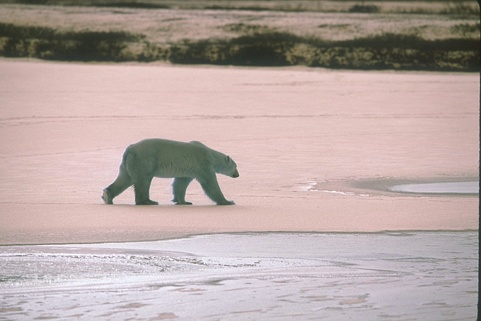

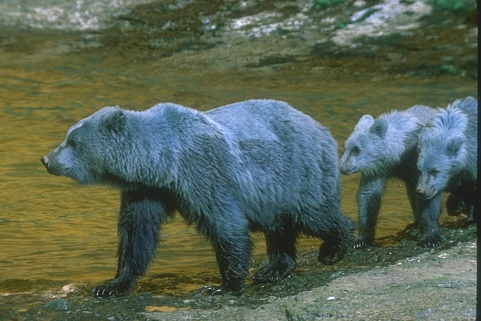

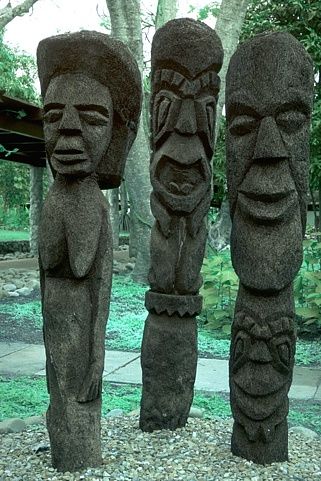

In [8]:
base='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/'

#load test data set
test_imgs,test_imgs_origin=load_image(base+'test/')

#load train data set
train_imgs,train_imgs_origin=load_image(base+'train/')


#load val data set
val_imgs,val_imgs_origin=load_image(base+'val/')

In [9]:
#load Ground truth data
groundtest_arr=[]
groundtrain_arr=[]
groundval_arr=[]
groundtest_arr,groundtrain_arr,groundval_arr=load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr)

Start conversion: train/
#################
stored in train 
############
Start conversion: test/
#################
stored in test 
############
Start conversion: val/
#################
stored in val  
############


**Q2. Visualize the image and the ground truth segmentation**

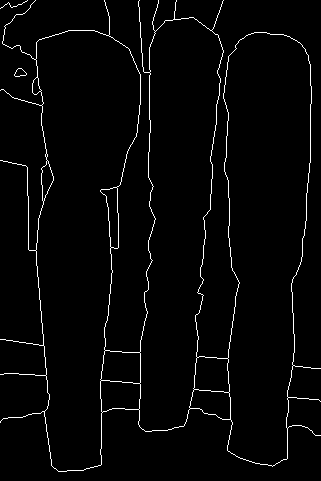

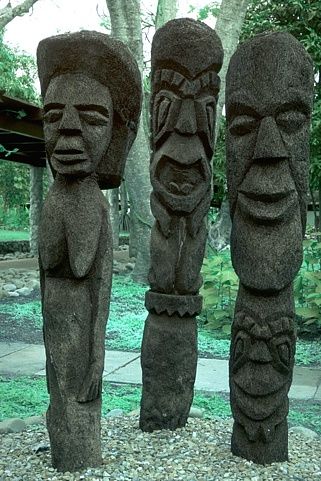

In [10]:
display_GT(np.array(groundval_arr[0]))

display_img(val_imgs[0],val_imgs_origin[0])

**Display mat file**

In [11]:
np.set_printoptions(threshold=100)
#np.set_printoptions(threshold=sys.maxsize)
root ='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/groundTruth/'
file_name='val/101085.mat'
# read a file 
x=io.loadmat(root+file_name)

print("\nground truth\n",x['groundTruth'][0][0][0][0][1])

print("\n Segmentation\n",x['groundTruth'][0][0][0][0][0])

print(x.keys())


ground truth
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Segmentation
 [[ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 ...
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]]
dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])


**Built in k-means**

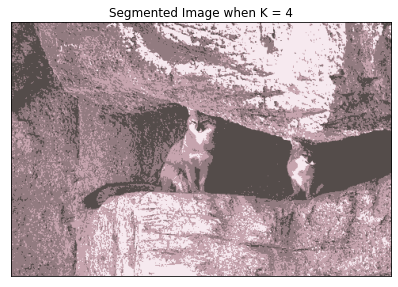

In [12]:
sample_image_builtin = train_imgs[11]

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=10
ret,label,center=cv2.kmeans(sample_image_builtin,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape(train_imgs_origin[11].shape)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


**Apply our K means**

CENTROIDS [array([158., 135., 143.], dtype=float32), array([142., 120., 122.], dtype=float32), array([210., 194., 223.], dtype=float32), array([92., 78., 69.], dtype=float32), array([140., 132., 143.], dtype=float32), array([122., 102., 103.], dtype=float32), array([255., 207., 175.], dtype=float32), array([255., 251., 254.], dtype=float32), array([118., 117., 131.], dtype=float32)]


<Figure size 720x720 with 0 Axes>

CLUSTERS --------------------------------- [[25, 29, 30, 31, 34, 35, 36, 38, 41, 42, 44, 45, 46, 48, 49, 50, 53, 54, 55, 59, 60, 62, 63, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 91, 92, 95, 99, 124, 129, 139, 141, 163, 172, 180, 181, 188, 191, 197, 205, 224, 233, 244, 251, 256, 316, 412, 428, 429, 432, 433, 434, 440, 443, 448, 460, 461, 511, 516, 517, 518, 519, 520, 524, 525, 526, 527, 532, 533, 534, 535, 536, 541, 542, 543, 546, 554, 555, 557, 558, 559, 560, 563, 564, 565, 566, 567, 568, 573, 574, 578, 581, 599, 600, 609, 616, 621, 644, 645, 653, 661, 662, 666, 673, 677, 678, 692, 701, 738, 759, 762, 831, 874, 877, 909, 910, 921, 924, 931, 932, 935, 939, 940, 941, 942, 943, 945, 965, 992, 998, 999, 1000, 1001, 1002, 1005, 1007, 1008, 1009, 1010, 1013, 1014, 1015, 1016, 1017, 1019, 1020, 1022, 1023, 1024, 1027, 1028, 1030, 1033, 1034, 1035, 1036, 1038, 1039, 1040, 1041, 1042, 1045, 1046, 1047, 1053, 1055, 1056, 1062, 1077, 1081, 1086, 1125, 1126, 1128, 1135, 1147, 1151, 1152

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[[  0.   0. 255.]
 [  0.   0. 255.]
 [  0.   0. 255.]
 ...
 [128. 128. 128.]
 [128. 128. 128.]
 [128. 128. 128.]]


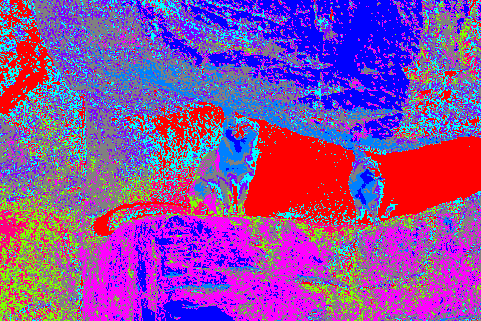

(9,)
37806
13659
23385
23530
9013
14708
6059
18525
7716


In [13]:
clusters_data = KMeans(9,train_imgs[11]) #00
clusters_data = np.array(clusters_data)
sample_image_abdo = train_imgs[11] ##
sample_image_abdo_shape = train_imgs_origin[11] ##
grey = [128 ,128, 128]
pink = [255, 0 ,127]
viola = [255, 0 ,255]
blue = [0, 0 ,255]
green = [0, 255 ,127]
yellow = [255, 255, 0]
orange = [255, 128, 0]
red = [255, 0, 0]
purple = [127, 0 ,255]
palette = [grey ,pink, viola ,blue ,green ,yellow, orange ,red ,purple]
for i in range(len(clusters_data)):
  for j in range(len(clusters_data[i])):
    index = clusters_data[i][j]
    sample_image_abdo [index] = palette[i]
print(sample_image_abdo )
cv2_imshow(sample_image_abdo.reshape(train_imgs_origin[11].shape)) 
print(clusters_data.shape)
print(len(clusters_data[0]))
print(len(clusters_data[1]))
print(len(clusters_data[2]))
print(len(clusters_data[3]))
print(len(clusters_data[4]))
print(len(clusters_data[5]))
print(len(clusters_data[6]))
print(len(clusters_data[7]))
print(len(clusters_data[8]))


# K- ways Normalized cut | K-NN graph , K=5

In [14]:
from sklearn.neighbors import kneighbors_graph
#k = 3 ( edge between three nearest neighbour)
graph= kneighbors_graph(train_imgs[0],5 , mode='connectivity', include_self=False)
print(graph)
# print("simlarity \n", graph.toarray(),graph.shape)

  (0, 4452)	1.0
  (0, 10996)	1.0
  (0, 141685)	1.0
  (0, 136427)	1.0
  (0, 126417)	1.0
  (1, 119750)	1.0
  (1, 1146)	1.0
  (1, 133098)	1.0
  (1, 122633)	1.0
  (1, 10983)	1.0
  (2, 125007)	1.0
  (2, 147053)	1.0
  (2, 129287)	1.0
  (2, 6668)	1.0
  (2, 14766)	1.0
  (3, 131190)	1.0
  (3, 150214)	1.0
  (3, 135586)	1.0
  (3, 140839)	1.0
  (3, 129286)	1.0
  (4, 129766)	1.0
  (4, 906)	1.0
  (4, 124998)	1.0
  (4, 138023)	1.0
  (4, 9527)	1.0
  :	:
  (154396, 138526)	1.0
  (154396, 111390)	1.0
  (154396, 133844)	1.0
  (154396, 111866)	1.0
  (154396, 112401)	1.0
  (154397, 109468)	1.0
  (154397, 106910)	1.0
  (154397, 124806)	1.0
  (154397, 95612)	1.0
  (154397, 139488)	1.0
  (154398, 152475)	1.0
  (154398, 76888)	1.0
  (154398, 151993)	1.0
  (154398, 84637)	1.0
  (154398, 95869)	1.0
  (154399, 107518)	1.0
  (154399, 85599)	1.0
  (154399, 95386)	1.0
  (154399, 110763)	1.0
  (154399, 125821)	1.0
  (154400, 91067)	1.0
  (154400, 90087)	1.0
  (154400, 114607)	1.0
  (154400, 91058)	1.0
  (154400, 1094

In [15]:
# from sklearn.metrics.pairwise import rbf_kernel
# # Compute Similarity Matrix  (simlarity matrix the same as weight matrix)
# Sim_1= rbf_kernel(train_imgs[0], gamma=.01)
# Sim_1

In [16]:
# array=np.zeros((154400,154400))
# array

In [22]:
train_imgs[118].shape

(154401, 3)

In [23]:
import sys
import numpy as np

# Create a npy file
x = np.random.rand(1000, 1000)
np.save('mydata.npy', x)

# Load as a normal array
y = np.load('mydata.npy')
sys.getsizeof(y)
# 8000112

# Load as a memory-mapped array
y = np.load('mydata.npy', mmap_mode='r')
sys.getsizeof(y)


144